In [1]:
import numpy as np 
import pandas as pd 
from scipy import stats 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels. api as sm 
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
milk=pd.read_csv('monthly-milk-production-pounds-p.csv')

In [5]:
milk

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0
...,...,...
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [6]:
milk.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [7]:
milk.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
milk.columns = ['Month', 'Milk in pounds per cow']

In [9]:
milk.drop(168,axis = 0,inplace = True)

In [10]:
milk['Month'] = pd.to_datetime(milk['Month'])

In [11]:
milk['Month']

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: Month, Length: 168, dtype: datetime64[ns]

In [12]:
milk.set_index('Month',inplace=True)

In [13]:
milk

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [14]:
milk.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [15]:
milk.tail()

,Milk in pounds per cow
Month,
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0
1975-11-01,797.0
1975-12-01,843.0


In [16]:
milk.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in pounds per cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


In [17]:
milk.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

<Axes: xlabel='Month'>

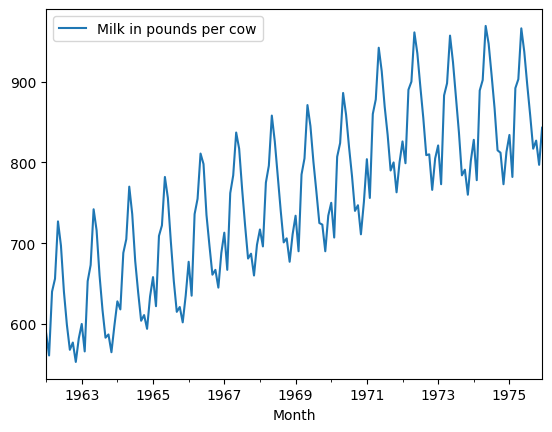

In [18]:
milk.plot()

In [19]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Milk in pounds per cow  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


In [20]:
milk_timeseries = milk['Milk in pounds per cow']

In [21]:
type(milk_timeseries)

pandas.core.series.Series

<Axes: xlabel='Month'>

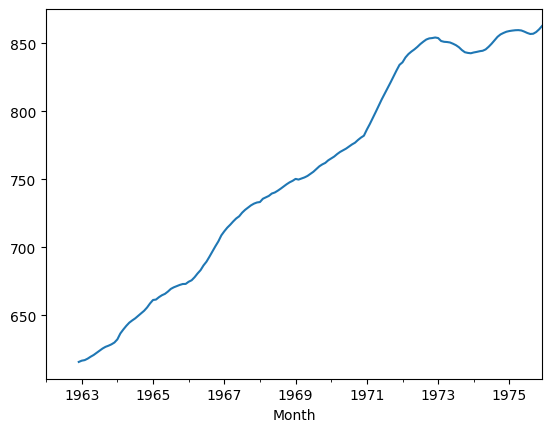

In [22]:
milk_timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

<Axes: xlabel='Month'>

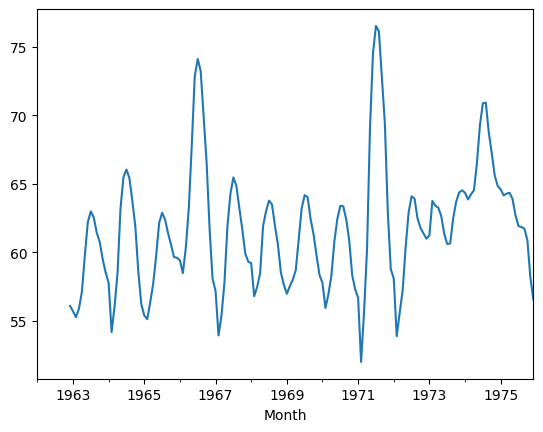

In [23]:
milk_timeseries.rolling(12).std().plot(label='12 Month Rolling Std')

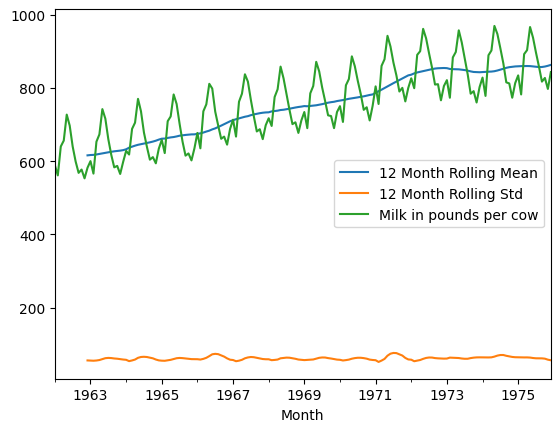

In [24]:
milk_timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
milk_timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
milk_timeseries.plot()
plt.legend()

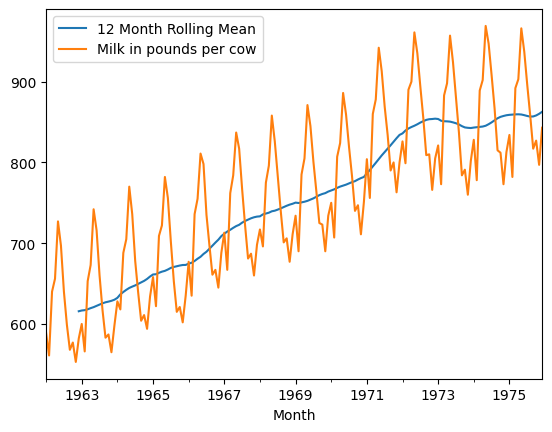

In [25]:
milk_timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
milk_timeseries.plot()
plt.legend()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
milk_decomposition = seasonal_decompose(milk['Milk in pounds per cow'])  

<Figure size 640x480 with 0 Axes>

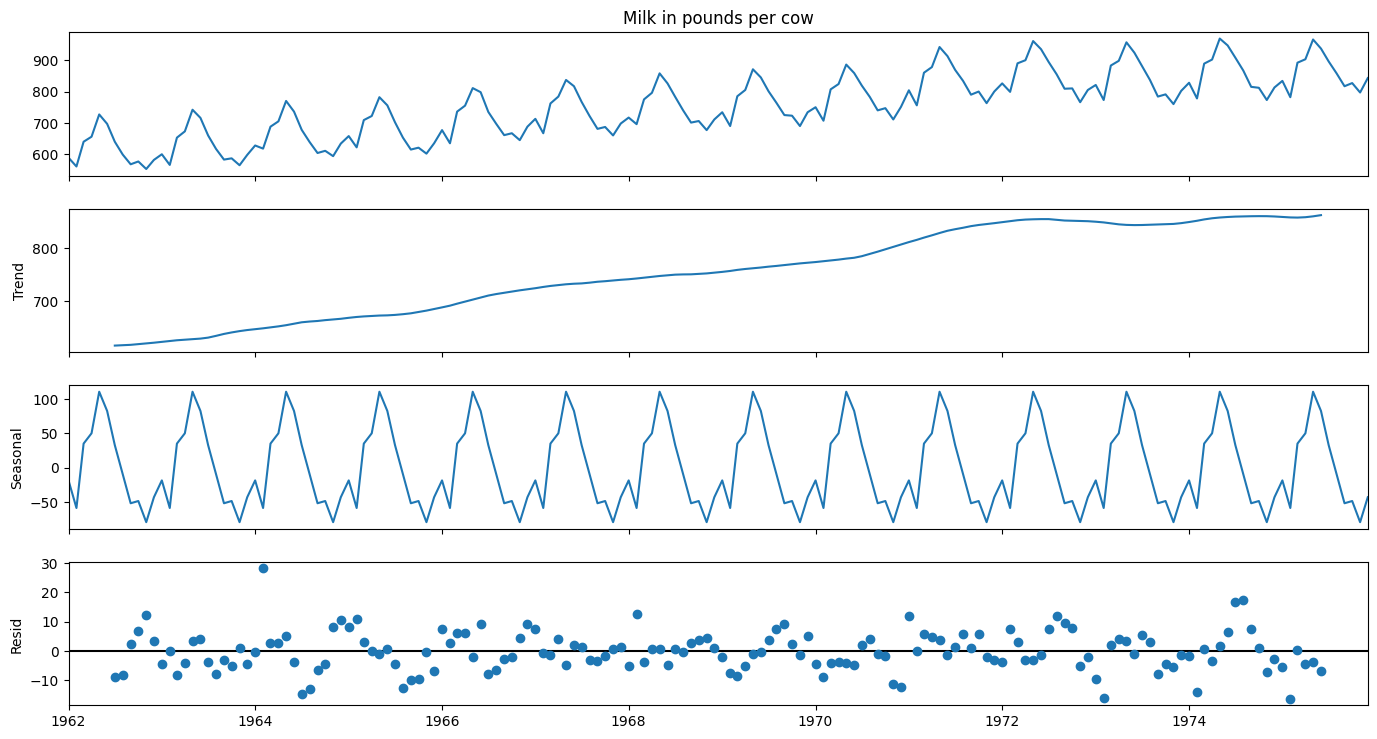

In [28]:
fig = plt.figure()  
fig = milk_decomposition.plot()  
fig.set_size_inches(15, 8)

In [29]:
milk.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
milk_result= adfuller(milk['Milk in pounds per cow'])

In [32]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [33]:
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [34]:
for value,label in zip(milk_result,labels):
    print(label+' : '+str(value) )

ADF Test Statistic : -1.3038115874221263
p-value : 0.6274267086030331
#Lags Used : 13
Number of Observations Used : 154


In [35]:
if milk_result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [36]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    milk_result= adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(milk_result,labels):
        print(label+' : '+str(value) )
    
    if milk_result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [37]:
milk['Milk First Difference'] = milk['Milk in pounds per cow'] - milk['Milk in pounds per cow'].shift(1)

In [38]:
milk['Milk First Difference'] 

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 168, dtype: float64

In [39]:
adf_check(milk['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530637
p-value : 0.03006800400178615
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

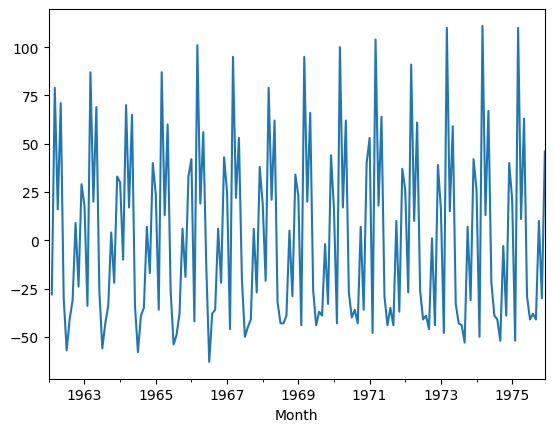

In [40]:
milk['Milk First Difference'].plot()

In [41]:
milk['Seasonal Difference'] = milk['Milk in pounds per cow'] - milk['Milk in pounds per cow'].shift(12)

In [42]:
milk['Seasonal Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: Seasonal Difference, Length: 168, dtype: float64

<Axes: xlabel='Month'>

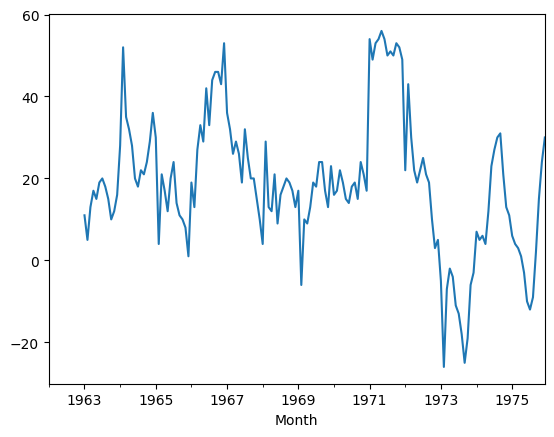

In [43]:
milk['Seasonal Difference'].plot()

In [44]:
adf_check(milk['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.335419314359402
p-value : 0.16079880527711227
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [45]:
milk['Seasonal First Difference'] = milk['Milk First Difference'] - milk['Milk First Difference'].shift(12)

<Axes: xlabel='Month'>

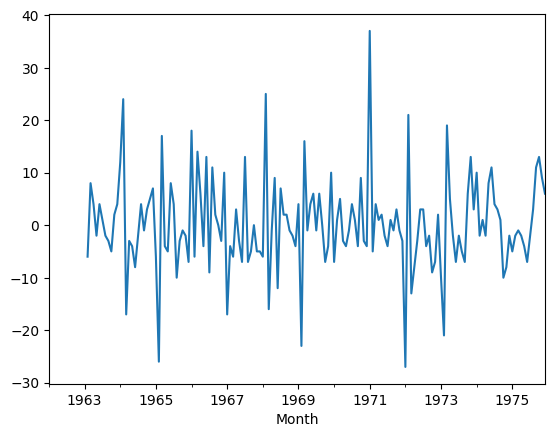

In [46]:
milk['Seasonal First Difference'].plot()

In [47]:
milk['Seasonal First Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 168, dtype: float64

In [48]:
adf_check(milk['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921985
p-value : 1.86542343187882e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [49]:
milk['Seasonal First Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 168, dtype: float64

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Axes: xlabel='Month'>

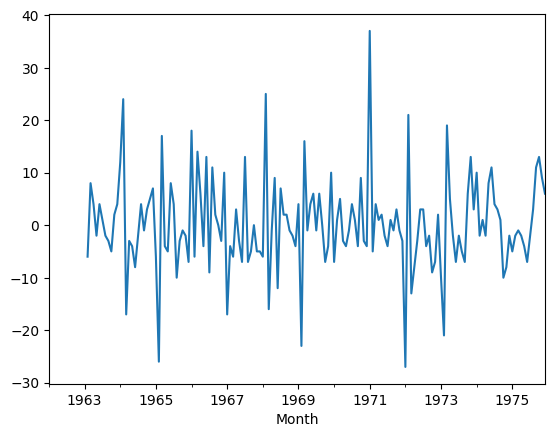

In [51]:
milk['Seasonal First Difference'].plot()

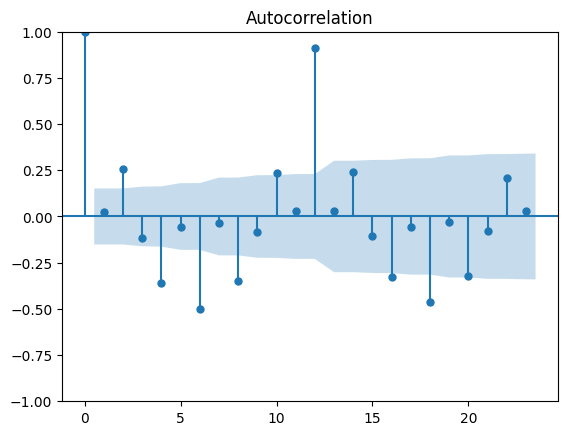

In [52]:
fig_first = plot_acf(milk["Milk First Difference"].dropna())

In [53]:
m=milk["Milk First Difference"].dropna()
m

Month
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
1962-06-01   -30.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 167, dtype: float64

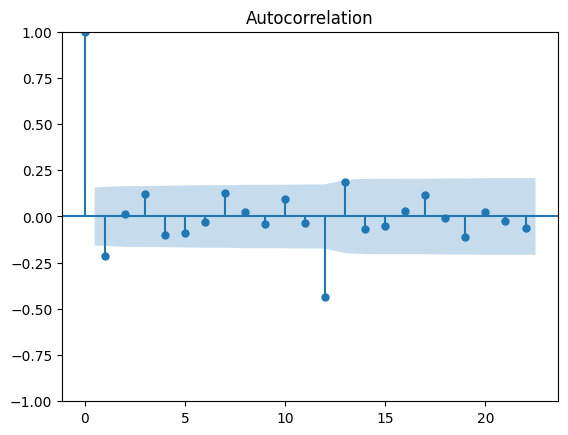

In [54]:
first_fig_season = plot_acf(milk["Seasonal First Difference"].dropna())

In [55]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

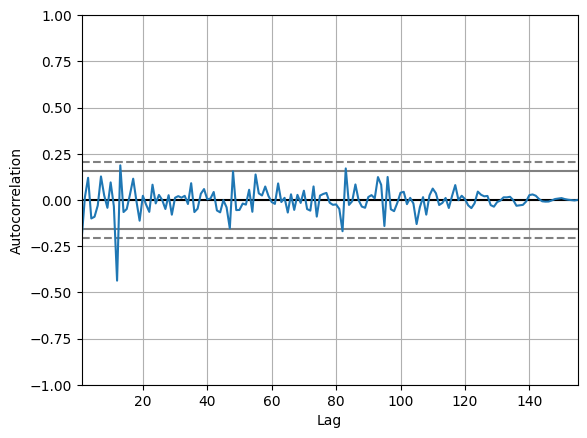

In [56]:
autocorrelation_plot(milk['Seasonal First Difference'].dropna())

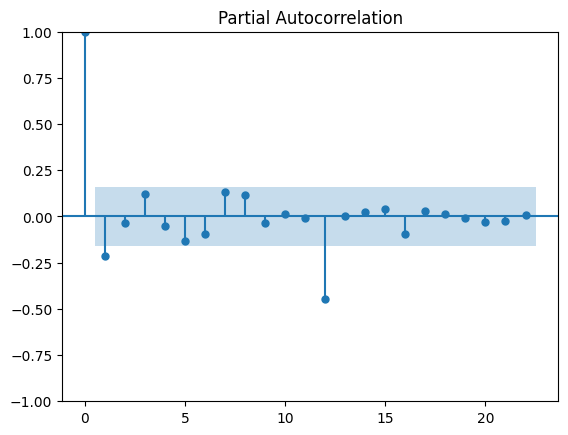

In [57]:
seasonal_result = plot_pacf(milk["Seasonal First Difference"].dropna())

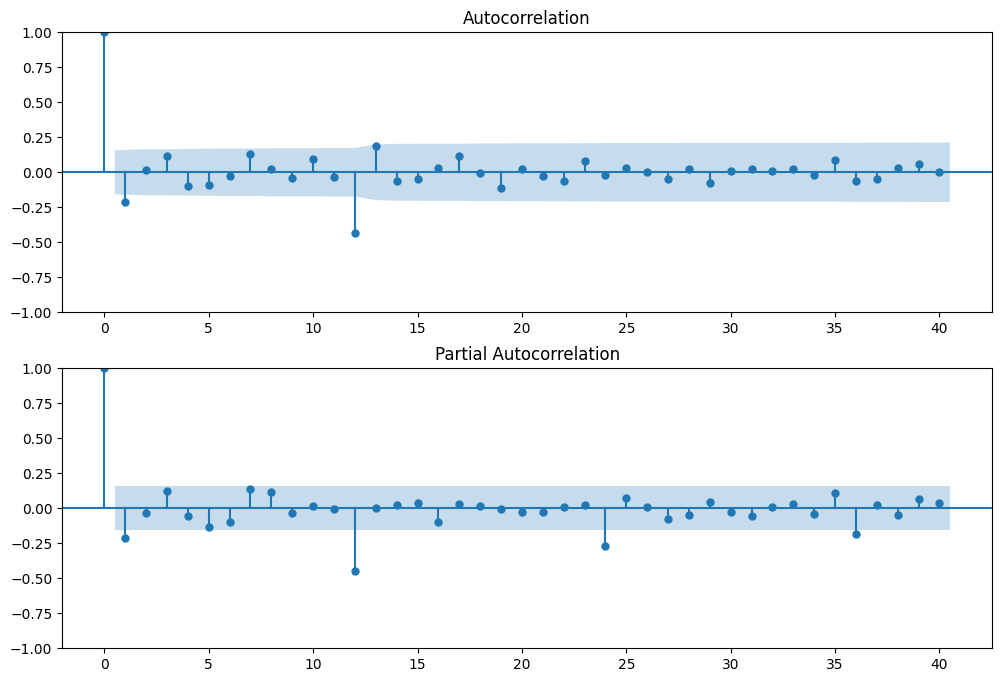

In [58]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(milk['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(milk['Seasonal First Difference'].iloc[13:],lags = 40, ax = ax2)

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
model = sm.tsa.statespace.SARIMAX(milk['Milk in pounds per cow'],order = (0,1,0),seasonal_order = (1,1,1,12))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
model_results = model.fit()
print(model_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Thu, 01 Feb 2024   AIC                           1074.131
Time:                                      01:51:40   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<Axes: xlabel='Month'>

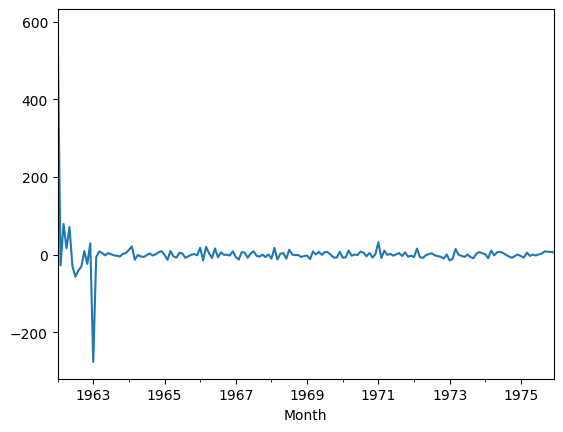

In [62]:
model_results.resid.plot()

<Axes: xlabel='Month'>

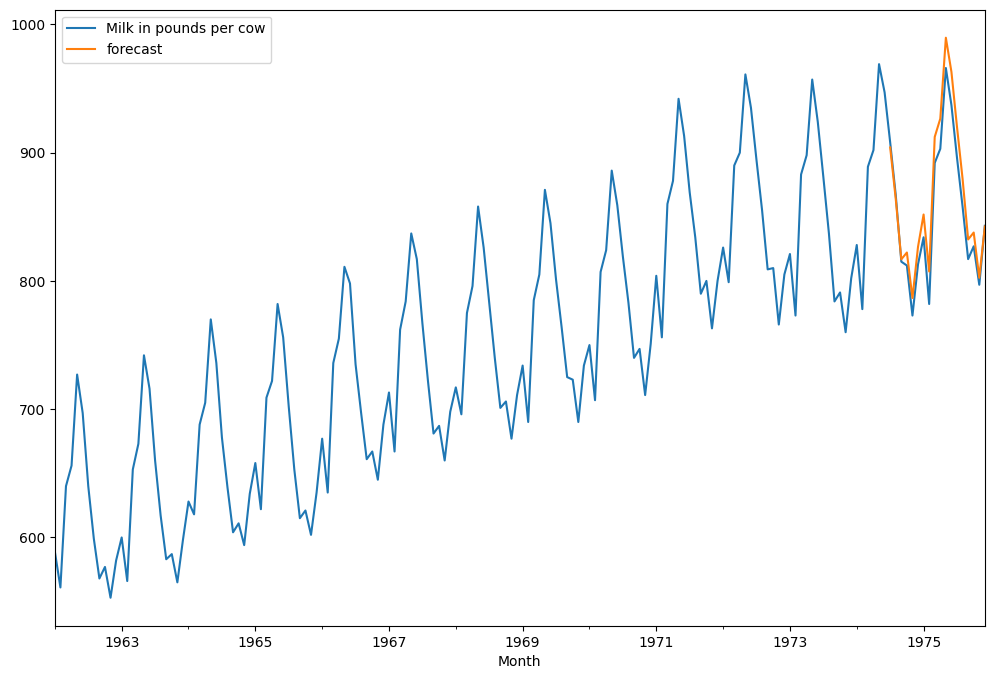

In [63]:
milk['forecast'] = model_results.predict(start = 150,end = 168,dynamic = True)  
milk[['Milk in pounds per cow','forecast']].plot(figsize = (12, 8))

In [64]:
milk.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1975-08-01,858.0,-38.0,-9.0,3.0,879.668973
1975-09-01,817.0,-41.0,2.0,11.0,832.328553
1975-10-01,827.0,10.0,15.0,13.0,837.722248
1975-11-01,797.0,-30.0,24.0,9.0,802.452735
1975-12-01,843.0,46.0,30.0,6.0,842.499869


In [65]:
from pandas.tseries.offsets import DateOffset

In [66]:
future_dates = [milk.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [67]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [68]:
future_dates_milk = pd.DataFrame(index = future_dates[1:],columns = milk.columns)

In [69]:
future_milk = pd.concat([milk,future_dates_milk])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14392\851521500.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_milk = pd.concat([milk,future_dates_milk])


In [70]:
future_milk.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


In [71]:
future_milk.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


<Axes: >

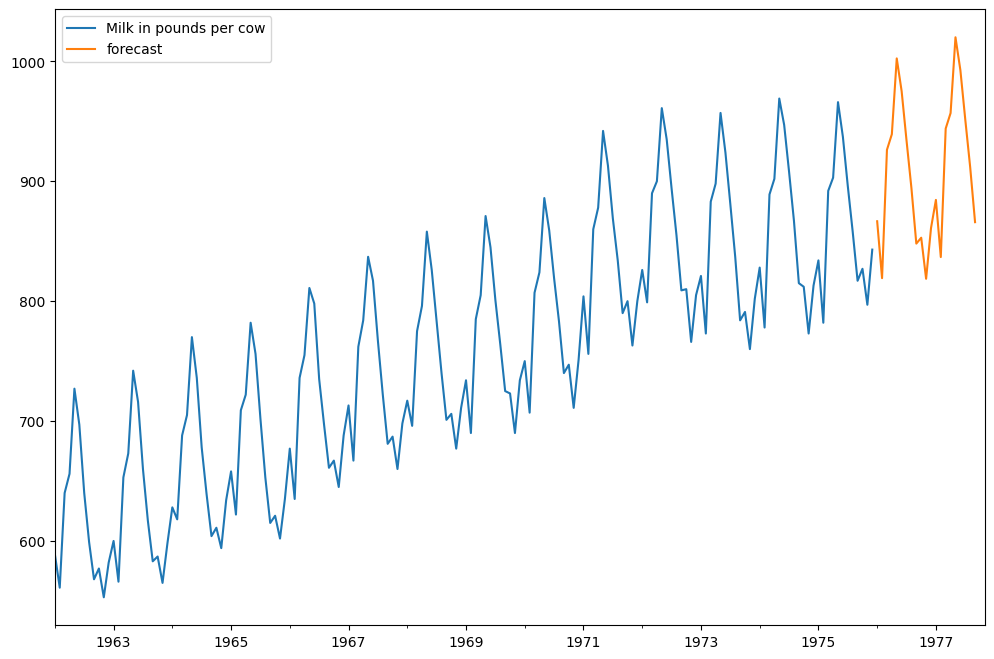

In [72]:
future_milk['forecast'] = model_results.predict(start = 168, end = 188,dynamic= True)  
future_milk[['Milk in pounds per cow', 'forecast']].plot(figsize = (12, 8)) 

In [73]:
milk.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1975-08-01,858.0,-38.0,-9.0,3.0,879.668973
1975-09-01,817.0,-41.0,2.0,11.0,832.328553
1975-10-01,827.0,10.0,15.0,13.0,837.722248
1975-11-01,797.0,-30.0,24.0,9.0,802.452735
1975-12-01,843.0,46.0,30.0,6.0,842.499869


In [74]:
from pandas.tseries.offsets import DateOffset

In [75]:
future_dates = [milk.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [76]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [77]:
future_dates_milk = pd.DataFrame(index = future_dates[1:],columns = milk.columns)

In [78]:
future_milk = pd.concat([milk,future_dates_milk])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14392\851521500.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_milk = pd.concat([milk,future_dates_milk])


In [79]:
future_milk.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


In [80]:
future_milk.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


<Axes: >

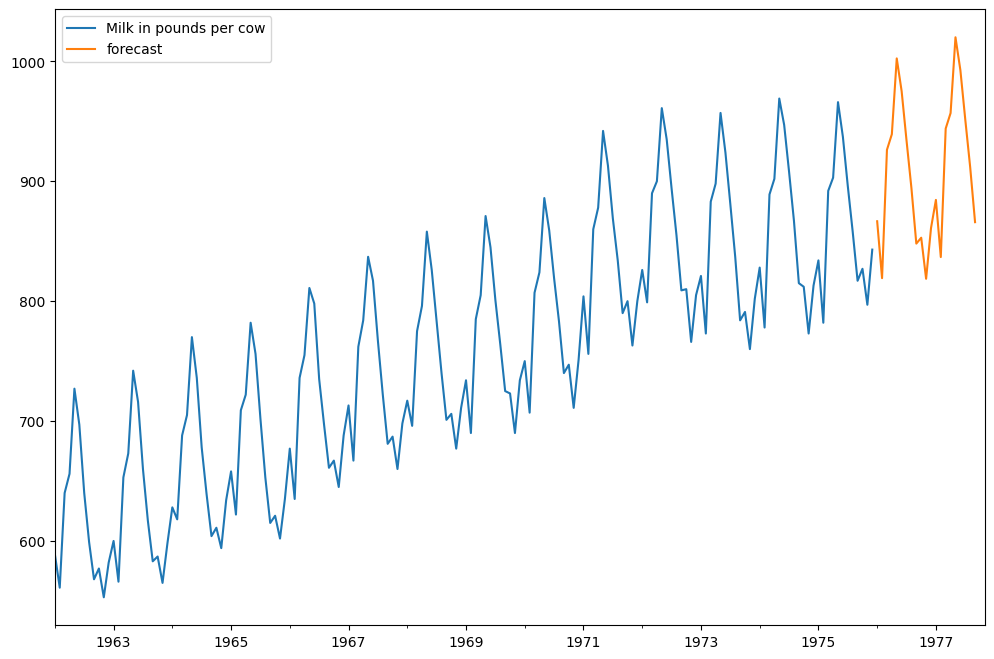

In [81]:
future_milk['forecast'] = model_results.predict(start = 168, end = 188,dynamic= True)  
future_milk[['Milk in pounds per cow', 'forecast']].plot(figsize = (12, 8)) 

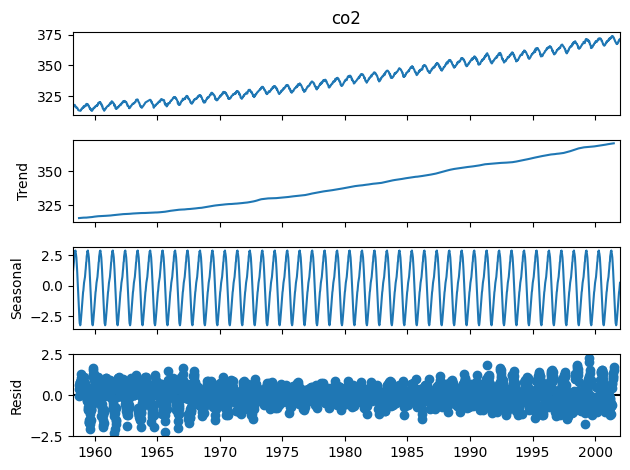

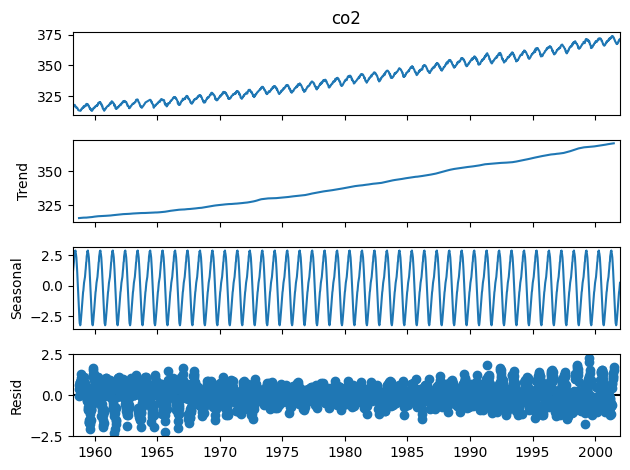

In [82]:
import statsmodels.api as sm

data = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
data.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(data.co2)
res.plot()